## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import json
import scipy.stats as sps
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import lasio
import math

## Распределения

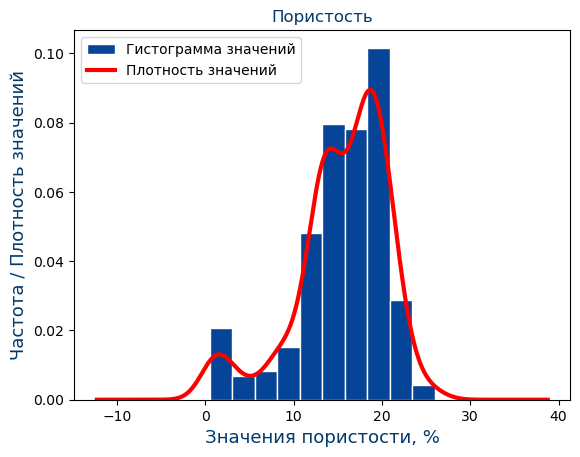

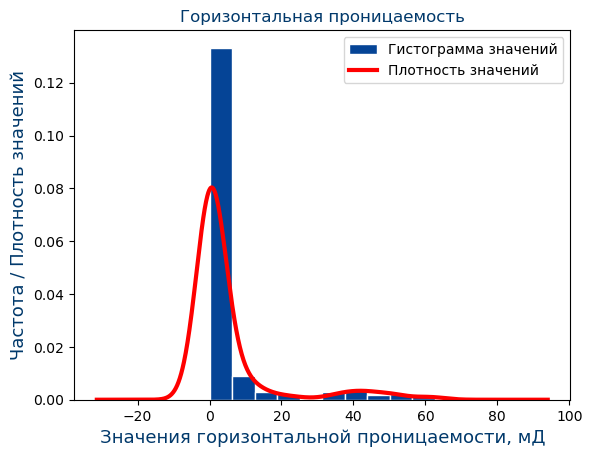

,Лабораторный номер,Интервал обора / верх,Интервал обора / низ,Место взятия,Вынос/м,Вынос/%,Открытая пористость,"Проницаемость, мД ||","Проницаемость, мД |_","Карбонатность, %",...,h,0,zscore_por,zscore_perm_hor,zscore_perm_vert,zscore_carb,zscore_water_sat,zscore_dens_dry,zscore_dens_wet,zscore_dens_matr
1,,,,,,,,,,,,,,,,,,,,,
F9.,2675,2430.0,2436.6,3.78,6.15,0.931818,16.64,50.366,NaN,NaN,...,0.22,2433.78,0.231892,3.625568,NaN,NaN,-1.524329,-0.345059,NaN,-0.618785
F9.,2745,2450.6,2457.7,5.48,7.10,1.000000,20.08,43.696,NaN,NaN,...,0.17,2456.08,0.887217,3.091386,NaN,NaN,-1.141772,-1.009936,NaN,-0.552413
F9.,2749,2450.6,2457.7,6.23,7.10,1.000000,17.87,52.992,NaN,NaN,...,0.20,2456.83,0.466209,3.835878,NaN,NaN,-1.476417,-0.489345,NaN,-0.282777
F9.,2750,2450.6,2457.7,6.32,7.10,1.000000,20.23,43.429,NaN,NaN,...,0.09,2456.92,0.915792,3.070003,NaN,NaN,-0.176019,-1.063590,NaN,-0.579377
F9.,3385,2450.6,2457.7,6.55,7.10,1.000000,20.41,51.625,NaN,NaN,...,0.23,2457.15,0.950082,3.726398,NaN,NaN,-1.555779,-1.146246,NaN,-0.834494
F9.,3386,2450.6,2457.7,6.83,7.10,1.000000,20.77,62.677,NaN,NaN,...,0.28,2457.43,1.018662,4.611523,NaN,NaN,-1.880116,-1.205701,NaN,-0.755677
F9.,3387,2450.6,2457.7,7.01,7.10,1.000000,20.43,43.934,NaN,NaN,...,0.18,2457.61,0.953892,3.110447,NaN,NaN,-0.835790,-1.112169,NaN,-0.685157
F9.,3393,2457.7,2464.9,1.13,7.20,1.000000,19.32,47.672,NaN,NaN,...,0.22,2458.83,0.742436,3.409813,NaN,NaN,-1.339151,-0.854774,NaN,-0.249591
F9.,3395,2457.7,2464.9,1.60,7.20,1.000000,19.91,43.519,NaN,NaN,...,0.24,2459.30,0.854831,3.077211,NaN,NaN,-1.676742,-1.050539,NaN,-0.699676


In [7]:
link = '    ' #link to data (файл формата xls)

data = pd.read_excel(link, index_col=0, header = 7)
df = data

df.columns = ['Лабораторный номер','Отбор параллельно/перпендикулярно', '//','Интервал обора / верх',
              'Интервал обора / низ','Место взятия','Вынос/м','Вынос/%','Открытая пористость','Проницаемость, мД ||',
              'Проницаемость, мД |_','Карбонатность, %', 'Водонасыщенность, %', 'Плотность сухого остатка, г/см^3','Плотность м.y.о., г/см^3',
              'Плотность скелета, г/см^3','Учтенные при подсчете','Литология','Примечание','h']

df = df.loc[df['Учтенные при подсчете'] != 'Скол'] #удаление знач.
df = df.loc[df['Учтенные при подсчете'] != 'Трещина']


df.drop(df.columns [[1, 2]], axis= 1 , inplace= True) #Удаление столбцов "Отбор" и "//"

df.replace(-999.25, np.nan, inplace=True) #замена непромеров на пустые ячейки

num_well = input("Номер скважины: ") #номер скважины
df = df.loc[num_well]

###БЛОК ФИЛЬТРАЦИИ ПО ГЛУБИНЕ####
H = df.loc[num_well, "Интервал обора / верх"] + df.loc[num_well, "Место взятия"]

df = pd.concat([df, H],axis = 1) #объединение датафреймов

H_1 = float(json.loads(input ('Введите начало интервала:'))) # ТИП FLOAT
H_2 = float(json.loads(input ('Введите конец интервала:'))) # ТИП FLOAT

df = df[H_2 >= df[0]]
df = df[df[0] >= H_1]
#################################

# ввод переменных из датафрейма
por = df.loc[num_well, "Открытая пористость"]
perm_hor = df.loc[num_well, 'Проницаемость, мД ||']
perm_vert = df.loc[num_well, 'Проницаемость, мД |_']
carb = df.loc[num_well, 'Карбонатность, %']
water_sat = df.loc[num_well, 'Водонасыщенность, %']
dens_dry = df.loc[num_well, 'Плотность сухого остатка, г/см^3']
dens_wet = df.loc[num_well, 'Плотность м.y.о., г/см^3']
dens_matr = df.loc[num_well, 'Плотность скелета, г/см^3']
del_inf = df.loc[num_well, 'Учтенные при подсчете']
lit = df.loc[num_well, 'Литология']
h = df.loc[num_well, 'h'].values #массив

############## ZSCORE ################
# Вычисление zscore + добавление в датафрейм

df['zscore_por'] = (por - por.mean())/por.std()
df['zscore_perm_hor'] = (perm_hor - perm_hor.mean())/perm_hor.std()
df['zscore_perm_vert'] = (perm_vert - perm_vert.mean())/perm_vert.std()
df['zscore_carb'] = (carb - carb.mean())/carb.std()
df['zscore_water_sat'] = (water_sat - water_sat.mean())/water_sat.std()
df['zscore_dens_dry'] = (dens_dry - dens_dry.mean())/dens_dry.std()
df['zscore_dens_wet'] = (dens_wet - dens_wet.mean())/dens_wet.std()
df['zscore_dens_matr'] = (dens_matr - dens_matr.mean())/dens_matr.std()

abnormal_values = df[(df.zscore_por<-3) | (df.zscore_por>3) | (df.zscore_perm_hor<-3) | (df.zscore_perm_hor>3) | (df.zscore_perm_vert<-3) | (df.zscore_perm_vert>3)]   #проверка условий



######## Графики ##############
### Пористость
por = por.loc[df['Открытая пористость'] != 0]
plt.hist(por, bins=None, density=True, edgecolor='white',
         label='Гистограмма значений', color='#054496')

por.plot.density(color='red', linewidth = 3,
                 label = 'Плотность значений')

plt.xlabel('Значения пористости, %', fontsize = 13, color='#01396b')  # Подпись оси x
plt.ylabel('Частота / Плотность значений', fontsize = 13, color='#01396b')  # Подпись оси y
plt.legend(fontsize=10)
plt.title('Пористость', color='#01396b')
plt.show()

### Горизонтальная проницаемость
perm_hor = perm_hor.loc[df['Проницаемость, мД ||'] != 0]

plt.hist(perm_hor, bins=None, density=True, edgecolor='white',
         label='Гистограмма значений', color='#054496')
perm_hor.plot.density(color='red', linewidth = 3,
                 label = 'Плотность значений')

plt.xlabel('Значения горизонтальной проницаемости, мД', fontsize = 13, color='#01396b')  # Подпись оси x
plt.ylabel('Частота / Плотность значений', fontsize = 13, color='#01396b')  # Подпись оси y
plt.legend(fontsize=10)
plt.title('Горизонтальная проницаемость', color='#01396b')
plt.show()

# ### Вертикальная проницаемость

# perm_vert = perm_vert.loc[df['Проницаемость, мД |_'] != 0]

# plt.hist(perm_vert, bins=1, density=True,
#          label='Гистограмма значений')
# perm_hor.plot.density(color='red',
#                  label = 'Плотность значений')

# plt.xlabel('Значения вертикальной проницаемости, мД')  # Подпись оси x
# plt.ylabel('Частота / Плотность значений')  # Подпись оси y
# plt.legend(fontsize=10)
# plt.title('Вертикальная проницаемость')
# plt.show()

abnormal_values #аномальные значения


## Лоренц плот

Text(0.5, 1.0, 'Lorenz plot (sorted)')

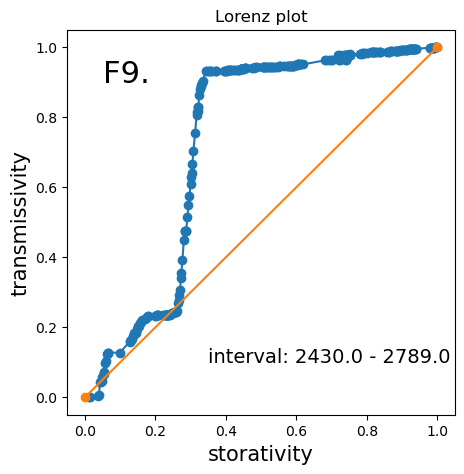

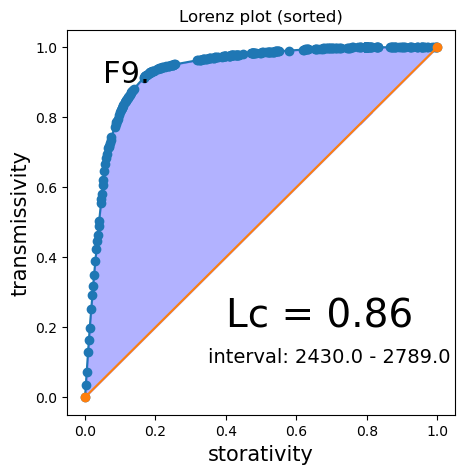

In [8]:
######НЕСОРТИРОВАННЫЙ ГРАФИК ЛОРЕНЦА##########
#блок матеши (Лоренц)
link = '    ' #link to data (файл формата xls)

df = pd.read_excel(link, index_col=0)

df = df.loc[df['Учтенные'] != 'Скол'] #удаление знач.
df = df.loc[df['Учтенные'] != 'Трещина']

###БЛОК ФИЛЬТРАЦИИ ПО ГЛУБИНЕ####
H = pd.DataFrame(df.loc[num_well, "Интервал"] + df.loc[num_well, "Место"]).rename(columns={0:'H'})
df = df.loc[num_well]

df = pd.concat([df, H],axis = 1) #объединение датафреймов

df = df[H_2 >= df['H']]
df = df[df['H'] >= H_1]
##################################


######НЕСОРТИРОВАННЫЙ ГРАФИК ЛОРЕНЦА##########

df = df.loc[df['Открыт.'] != 0] #удаление нулей по пористости
df = df.loc[df['Проницаемость.'] != -999.25] #удаление непромеров проницаемости
perm_hor = df.loc[num_well, 'Проницаемость.'].values #массив
por = df.loc[num_well, "Открыт."].values #массив
h = df.loc[num_well, 'h'].values #массив

k_h = perm_hor*h # k*h
sum_kh = sum(k_h)

por_h = por*h/100 #por*h
sum_porh = sum(por_h)

cum_k_h = k_h.cumsum() #накоп
cum_por_h = por_h.cumsum() #накоп

trans = cum_k_h/sum_kh #transmissivity (Пропускная способность)
stor = cum_por_h/sum_porh #storativity (типо емкость)

percent = [0, 1.0]
lorenz = [0, 1.0]

plt.figure(figsize = (5,5))
plt.plot(stor, trans, '-o')
plt.plot(percent, lorenz, '-o', label = 'Lorenz curve')
plt.xlabel('storativity', fontsize = 15)
plt.ylabel('transmissivity', fontsize = 15)
plt.title('Lorenz plot')
plt.text(0.35,0.1,'interval: {:0.1f} - {:0.1f}'.format(H_1, H_2),fontsize = 14)
plt.text(0.05, 0.9, num_well, fontsize = 22) #вывод названия скважины

######СОРТИРОВАННЫЙ ГРАФИК ЛОРЕНЦА##########

k_phi = df.loc[num_well, 'Проницаемость.'] / df.loc[num_well, "Открыт."]
k_phi = pd.DataFrame(k_phi).rename(columns={0:'k/phi'}) #перевод в датафрейм + переименование столбца

df = pd.concat([df, k_phi], axis = 1) #объединение датафреймов

df_2 = df.sort_values (by='k/phi', ascending=False) #отсортированный по уменьшению k/phi

perm_hor_2 = df_2.loc[num_well, 'Проницаемость.'].values #массив
por_2 = df_2.loc[num_well, "Открыт."].values #массив
h_2 = df_2.loc[num_well, 'h'].values #массив

k_h_2 = perm_hor_2*h_2 #k*h
sum_kh_2 = sum(k_h_2)

por_h_2 = por_2*h_2/100 #por*h
sum_porh_2 = sum(por_h_2)

cum_k_h_2 = k_h_2.cumsum() #накоп
cum_por_h_2 = por_h_2.cumsum() #накоп

trans_2 = np.insert(cum_k_h_2/sum_kh_2,0,0).astype(float) #transmissivity (Пропускная способность) + добавление точки (0,0) + приведение к массиву
stor_2 = np.insert(cum_por_h_2/sum_porh_2,0,0).astype(float) #storativity (типо емкость) + добавление точки (0,0) + приведение к массиву

percent = [0, 1]
lorenz = [0, 1]

def trapz_integral(x, y):
    integral = 0
    for i in range(1, len(x)):
        dx = x[i] - x[i-1]
        trap_area = (y[i] + y[i-1]) * dx / 2
        integral += trap_area
    return integral

rezult = trapz_integral(stor_2, trans_2) - trapz_integral(percent, lorenz) # площадь выделенной фигуры (площадь всей фигуры под графиком - площадь под линией
Lc = rezult/trapz_integral(percent, lorenz) #коэффициент Лоренца

plt.figure(figsize = (5,5))
plt.plot(stor_2, trans_2, '-o')
plt.plot(percent, lorenz, '-o', label = 'Lorenz curve')
plt.fill_between(stor_2, stor_2, trans_2, color = 'blue', alpha=0.3)
plt.xlabel('storativity', fontsize = 15)
plt.ylabel('transmissivity', fontsize = 15)
plt.text(0.4,0.2,'Lc = {:0.2f}'.format(Lc),fontsize = 28)
plt.text(0.35,0.1,'interval: {:0.1f} - {:0.1f}'.format(H_1, H_2),fontsize = 14)
plt.text(0.05, 0.9, num_well, fontsize = 22) #вывод названия скважины
plt.title('Lorenz plot (sorted)')

## zscore для всех скважин 

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sps

# Загрузка данных
link = '    ' #link to data (файл формата xls)
data = pd.read_excel(link, index_col=0, header=7)
df = data

# Переименование столбцов
df.columns = ['Лабораторный номер', 'Отбор параллельно/перпендикулярно', '//', 'Интервал обора / верх',
              'Интервал обора / низ', 'Место взятия', 'Вынос/м', 'Вынос/%', 'Открытая пористость', 'Проницаемость, мД ||',
              'Проницаемость, мД |_', 'Карбонатность, %', 'Водонасыщенность, %', 'Плотность сухого остатка, г/см^3', 'Плотность м.y.о., г/см^3',
              'Плотность скелета, г/см^3', 'Учтенные при подсчете', 'Литология', 'Примечание', 'h']

# Удаление значений, которые не учтены при подсчете
df = df.loc[df['Учтенные при подсчете'] != 'Скол']
df = df.loc[df['Учтенные при подсчете'] != 'Трещина']

# Удаление ненужных столбцов
df.drop(df.columns[[1, 2]], axis=1, inplace=True)

# Замена непромеров на пустые ячейки
df.replace(-999.25, np.nan, inplace=True)

# Функция для вычисления zscore и поиска аномальных значений для каждой скважины
def calculate_zscore_anomalies(df, well_num):
    df_well = df.loc[well_num]

    # Вычисление zscore для каждого параметра
    df_well['zscore_por'] = (df_well['Открытая пористость'] - df_well['Открытая пористость'].mean()) / df_well['Открытая пористость'].std()
    df_well['zscore_perm_hor'] = (df_well['Проницаемость, мД ||'] - df_well['Проницаемость, мД ||'].mean()) / df_well['Проницаемость, мД ||'].std()
    df_well['zscore_perm_vert'] = (df_well['Проницаемость, мД |_'] - df_well['Проницаемость, мД |_'].mean()) / df_well['Проницаемость, мД |_'].std()
    df_well['zscore_carb'] = (df_well['Карбонатность, %'] - df_well['Карбонатность, %'].mean()) / df_well['Карбонатность, %'].std()
    df_well['zscore_water_sat'] = (df_well['Водонасыщенность, %'] - df_well['Водонасыщенность, %'].mean()) / df_well['Водонасыщенность, %'].std()
    df_well['zscore_dens_dry'] = (df_well['Плотность сухого остатка, г/см^3'] - df_well['Плотность сухого остатка, г/см^3'].mean()) / df_well['Плотность сухого остатка, г/см^3'].std()
    df_well['zscore_dens_wet'] = (df_well['Плотность м.y.о., г/см^3'] - df_well['Плотность м.y.о., г/см^3'].mean()) / df_well['Плотность м.y.о., г/см^3'].std()
    df_well['zscore_dens_matr'] = (df_well['Плотность скелета, г/см^3'] - df_well['Плотность скелета, г/см^3'].mean()) / df_well['Плотность скелета, г/см^3'].std()

    # Проверка условий на аномалии
    abnormal_values = df_well[(df_well['zscore_por'] < -3) | (df_well['zscore_por'] > 3) |
                              (df_well['zscore_perm_hor'] < -3) | (df_well['zscore_perm_hor'] > 3) |
                              (df_well['zscore_perm_vert'] < -3) | (df_well['zscore_perm_vert'] > 3)]

    return abnormal_values

# Создание пустого DataFrame для хранения всех аномалий
all_abnormal_values = pd.DataFrame()

# Обработка всех скважин
for well_num in df.index.unique():
    abnormal_values = calculate_zscore_anomalies(df, well_num)
    all_abnormal_values = pd.concat([all_abnormal_values, abnormal_values], ignore_index=True)

# Вывод аномальных значений для всех скважин
#all_abnormal_values.to_excel('/Users/mikhail/Desktop/Парсер/Вылеты.xlsx')


/var/folders/fs/tznr_kk15j7bmbcjgq4spr8r0000gn/T/ipykernel_825/3536392473.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well['zscore_por'] = (df_well['Открытая пористость'] - df_well['Открытая пористость'].mean()) / df_well['Открытая пористость'].std()
/var/folders/fs/tznr_kk15j7bmbcjgq4spr8r0000gn/T/ipykernel_825/3536392473.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well['zscore_perm_hor'] = (df_well['Проницаемость, мД ||'] - df_well['Проницаемость, мД ||'].mean()) / df_well['Проница

## Достаточность количества измерений 

In [56]:
# 1 скважина 
# Удалим значения NaN из массива Poro
Poro = np.array(por) / 100
# Poro = Poro[~np.isnan(Poro)]

# Расчеты для пористости
poro_std = np.std(Poro)
Cv_poro = poro_std / np.mean(Poro)
N0_poro = round((10 * Cv_poro)**2, 0)
Ps_poro = round((200 * Cv_poro) / math.sqrt(len(Poro)), 3)

# Удалим значения NaN и 0.001 из массива Perm
Perm = np.array(perm_hor)
# Perm = Perm[~np.isnan(Perm)]
Perm = Perm[Perm != 4.028]
Perm = Perm[Perm != 5.76]
Perm = Perm[Perm != 6.426]
Perm = Perm[Perm != 0.001]

# Расчеты для проницаемости
perm_std = np.std(Perm)
Cv_perm = perm_std / np.mean(Perm)
N0_perm = round((10 * Cv_perm)**2, 0)
Ps_perm = round((200 * Cv_perm) / math.sqrt(len(Perm)), 3)

# Вывод результатов
print("Достигаемое допустимое отклонение по пористости:", Ps_poro)
print("Оптимальное количество точек с данными:", N0_poro)
print("Текущее количество точек с данными:", len(Poro))

print("Достигаемое допустимое отклонение по проницаемости:", Ps_perm)
print("Оптимальное количество точек с данными:", N0_perm)
print("Текущее количество точек с данными:", len(Perm))

Достигаемое допустимое отклонение по пористости: 11.133
Оптимальное количество точек с данными: 10.0
Текущее количество точек с данными: 31
Достигаемое допустимое отклонение по проницаемости: 47.388
Оптимальное количество точек с данными: 174.0
Текущее количество точек с данными: 31


## данные ГИС

Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files


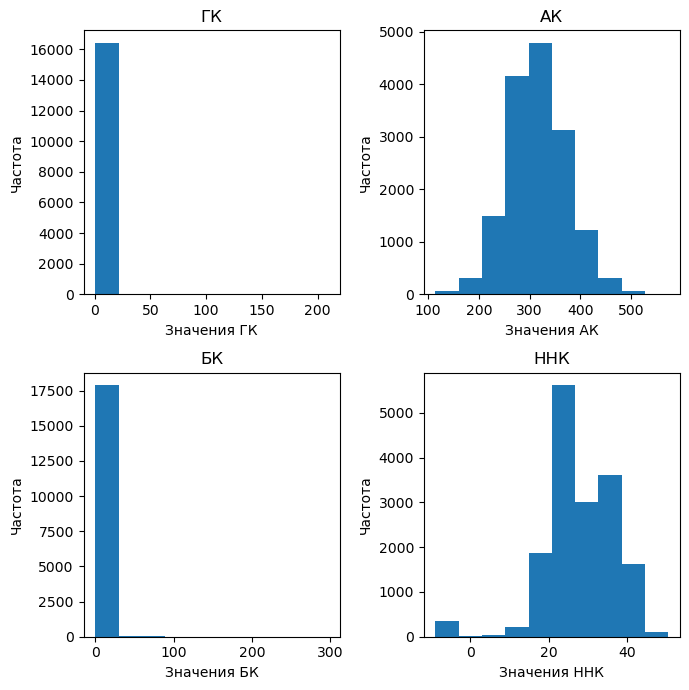

In [57]:
# F1

# Чтение данных из LAS файлов
las_F1_GK = lasio.read('    ') #link to data (файл формата .las)
las_F1_DTP = lasio.read('   ')
las_F1_BK = lasio.read('    ')
las_F1_W = lasio.read('    ')

las_F1_W.keys()

# Объединение данных в один DataFrame
df_F1 = pd.concat([pd.DataFrame(las_F1_GK['GK   OK']), pd.DataFrame(las_F1_DTP['DTP']), pd.DataFrame(las_F1_BK ['BK OK']), pd.DataFrame(las_F1_W ['W  OK'])], axis=1)
df_F1.columns = ['ГК', 'АК', 'БК', 'ННК']

# Определение количества строк и столбцов для графиков
rows = 2
cols = 2

# Создание графиков
fig = plt.figure(figsize=(7,7))

for i, feature in enumerate(list(df_F1)):
    ax = fig.add_subplot(rows, cols, i+1)
    df_F1[feature].hist(bins=None, ax=ax, facecolor='#1f77b4')
    ax.set_title(feature)
    ax.set_xlabel(f'Значения {feature}')
    ax.set_ylabel('Частота')
    ax.set_axisbelow(True)
    ax.grid()

plt.tight_layout()
plt.show()
